In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab.files import upload
from sklearn.linear_model import ElasticNet, BayesianRidge, LassoLarsIC
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import  GradientBoostingRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.pipeline import make_pipeline

In [0]:
upload()
train = pd.read_csv('final_train_data.csv')
test = pd.read_csv('final_test_data.csv')
train.head()

Saving final_test_data.csv to final_test_data.csv
Saving final_train_data.csv to final_train_data.csv


,Unnamed: 0,Country Name,Country Code,Year,Balance,Inflation,GDP,Exports,Trade
0,0,Senegal,SEN,1983,-3.043829e+08,9.274213,-5.326393,6.180000e+08,59.224298
1,1,Togo,TGO,2009,-1.766692e+08,1.855275,3.510297,9.030260e+08,76.242542
2,2,Pakistan,PAK,1992,-1.876092e+09,10.057085,7.705898,7.351000e+09,34.489440
3,3,Nepal,NPL,1988,-2.714506e+08,11.815310,7.696809,1.900000e+08,24.978422
4,5,Malta,MLT,2016,7.269132e+08,1.604548,5.516617,3.017299e+09,83.781471


In [0]:
train.drop(columns='Unnamed: 0',axis=1,inplace=True)
test.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [0]:
train.head()

,Country Name,Country Code,Year,Balance,Inflation,GDP,Exports,Trade
0,Senegal,SEN,1983,-3.043829e+08,9.274213,-5.326393,6.180000e+08,59.224298
1,Togo,TGO,2009,-1.766692e+08,1.855275,3.510297,9.030260e+08,76.242542
2,Pakistan,PAK,1992,-1.876092e+09,10.057085,7.705898,7.351000e+09,34.489440
3,Nepal,NPL,1988,-2.714506e+08,11.815310,7.696809,1.900000e+08,24.978422
4,Malta,MLT,2016,7.269132e+08,1.604548,5.516617,3.017299e+09,83.781471


In [0]:
test.head()

,Country Name,Country Code,Year,Inflation,GDP,Exports,Trade
0,Cyprus,CYP,2001,3.657166,3.600665,9.760000e+08,46.359979
1,Benin,BEN,1995,15.099452,6.045199,4.200000e+08,53.726740
2,Bangladesh,BGD,1995,7.144939,5.121278,3.501000e+09,26.871554
3,Paraguay,PRY,1978,9.706191,12.028730,2.569700e+08,27.230654
4,Morocco,MAR,1987,3.014808,-0.325004,2.826000e+09,32.418633


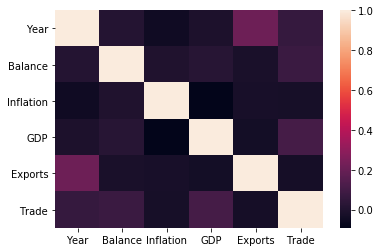

In [0]:
plt.style.use('seaborn-colorblind')
sns.heatmap(train.corr())

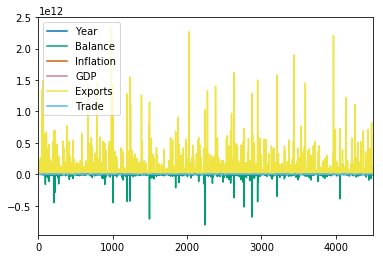

In [0]:
train.plot()
#plt.plot(train['Year'],train['Inflation']);

In [0]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,4506.0,1.996315e+03,1.219629e+01,1.960000e+03,1.986000e+03,1.997000e+03,2.007000e+03,2.016000e+03
Balance,4506.0,-5.132031e+08,3.561007e+10,-8.060000e+11,-9.811873e+08,-1.603287e+08,2.885250e+07,4.210000e+11
Inflation,4261.0,3.161346e+01,3.538180e+02,-2.969107e+01,2.400000e+00,6.184351e+00,1.240971e+01,1.361163e+04
GDP,4262.0,3.641224e+00,4.850978e+00,-6.207592e+01,1.481036e+00,3.799969e+00,6.050231e+00,3.450000e+01
Exports,4490.0,4.339613e+10,1.445441e+11,2.000000e+06,4.804255e+08,2.930136e+09,2.044775e+10,2.340000e+12
Trade,4304.0,6.288931e+01,4.675398e+01,7.920909e+00,3.809632e+01,5.243651e+01,7.674579e+01,9.577840e+02


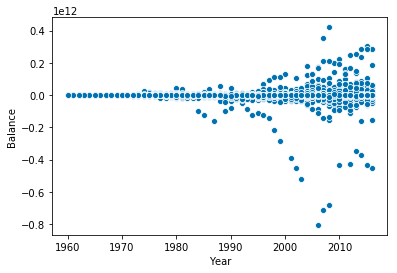

In [0]:
sns.scatterplot(train['Year'],train['Balance']);

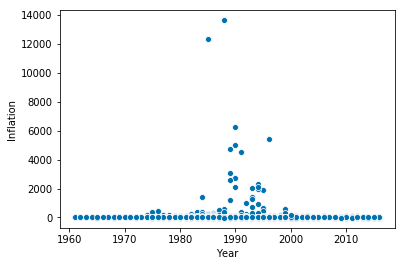

In [0]:
sns.scatterplot(train['Year'],train['Inflation']);

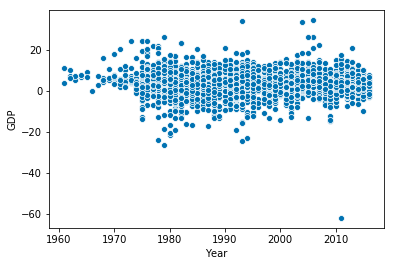

In [0]:
sns.dis(train['Year'],train['GDP']);

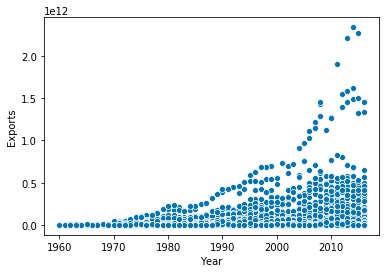

In [0]:
sns.scatterplot(train['Year'],train['Exports']);

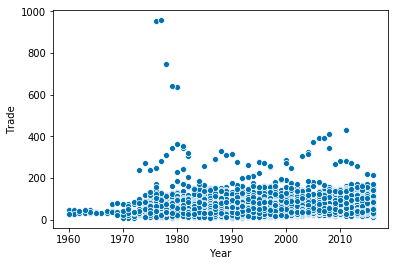

In [0]:
sns.scatterplot(train['Year'],train['Trade']);

In [0]:
train.isnull().sum()

Country Name      0
Country Code      0
Year              0
Balance           0
Inflation       245
GDP             244
Exports          16
Trade           202
dtype: int64

In [0]:
test.isnull().sum()

Country Name    0
Country Code    0
Year            0
Inflation       0
GDP             0
Exports         0
Trade           0
dtype: int64

In [0]:
df = train.copy()
train['Inflation'].fillna(train['Inflation'].mean(),inplace=True)
train['GDP'].fillna(train['GDP'].mean(),inplace=True)
train['Exports'].fillna(train['Exports'].mean(),inplace=True)
train['Trade'].fillna(train['Trade'].mean(),inplace=True)
train.isnull().sum()

Country Name    0
Country Code    0
Year            0
Balance         0
Inflation       0
GDP             0
Exports         0
Trade           0
dtype: int64

In [0]:
train.dtypes

Country Name     object
Country Code     object
Year              int64
Balance         float64
Inflation       float64
GDP             float64
Exports         float64
Trade           float64
dtype: object

In [0]:
categorical_features_indices = np.where(train.dtypes != np.float)[0]
categorical_features_indices
column = ['Inflation', 'GDP','Exports', 'Trade']

In [0]:
#Creating a training set for modeling and validation set to check model performance
#X = train[column]
#y = train.Balance

#from sklearn.model_selection import train_test_split
#X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.7, random_state=1234)

In [0]:
#from sklearn.tree import DecisionTreeRegressor
#dt_reg = DecisionTreeRegressor().fit(X_train, y_train)

#print('Train : ', dt_reg.score(X_train, y_train))
#print('Test : ',dt_reg.score(X_validation, y_validation))

Train :  0.9999999673359022
Test :  0.625781414501253


In [0]:
#DecisionTreeRegressor?
#dt_reg1 = DecisionTreeRegressor(random_state=100,max_depth=5).fit(X_train, y_train)

#print('Train : ', dt_reg1.score(X_train, y_train))
#print('Test : ',dt_reg1.score(X_validation, y_validation))

Train :  0.8938641422478368
Test :  0.7607415910472972


In [0]:
# depths = list(range(1,9))
# depths

# train_scores=[]
# test_scores=[]
# for i in depths:
  # dt_reg_loop = DecisionTreeRegressor(criterion='mse',min_samples_split=3,max_leaf_nodes=30,random_state=1,max_depth=i).fit(X_train, y_train)
  # train_score = dt_reg_loop.score(X_train, y_train)
  # train_scores.append(train_score)
  # test_score = dt_reg_loop.score(X_validation, y_validation)
  # test_scores.append(test_score)
  
# df_dt = pd.DataFrame({'Train':train_scores,'Test':test_scores})
# df_dt

,Train,Test
0,0.060090,-0.266207
1,0.686677,0.674521
2,0.779698,0.766251
3,0.845972,0.774842
4,0.893215,0.772912
5,0.906832,0.754094
6,0.912222,0.759724
7,0.916380,0.731666


In [0]:
# from sklearn.ensemble import RandomForestRegressor
# depths = list(range(1,10))
# random_state=10

# RF_train_scores=[]
# RF_test_scores=[]
# for i in depths:
  # dt_reg_loop = RandomForestRegressor(n_estimators=500,criterion='mse',random_state=random_state,max_depth=i).fit(X_train, y_train)
  # train_score = dt_reg_loop.score(X_train, y_train)
  # RF_train_scores.append(train_score)
  # test_score = dt_reg_loop.score(X_validation, y_validation)
  # RF_test_scores.append(test_score)
  
# df_rf = pd.DataFrame({'Train':RF_train_scores,'Test':RF_test_scores})
# df_rf

,Train,Test
0,0.071157,-0.128925
1,0.619878,0.527938
2,0.721844,0.589513
3,0.781490,0.611260
4,0.820759,0.645835
5,0.846681,0.645748
6,0.866400,0.655251
7,0.884145,0.673289
8,0.896318,0.676353


In [0]:
#from sklearn.neighbors import KNeighborsRegressor

# val = list(range(200,250,10))
# Kn_train_scores=[]
# Kn_test_scores=[]
# for i in val:
  # knn_reg = KNeighborsRegressor(n_neighbors=i).fit(X_train,y_train)
  # train_score = knn_reg.score(X_train, y_train)
  # Kn_train_scores.append(train_score)
  # test_score = knn_reg.score(X_validation, y_validation)
  # Kn_test_scores.append(test_score)
  
# df_Kn = pd.DataFrame({'Train':Kn_train_scores,'Test':Kn_test_scores})
# # df_Kn


,Train,Test
0,0.012388,-0.014945
1,0.011833,-0.014996
2,0.011106,-0.014984
3,0.010623,-0.015476
4,0.010284,-0.015367


In [0]:
# el_Reg = ElasticNet(alpha=100, l1_ratio=0.0001,normalize=True,max_iter=50,random_state=100).fit(X_train,y_train)

# print('Trainning Score : {:.4f}'.format(el_Reg.score(X_train, y_train)))
# print('Testing Score   : {:.4f}'.format(el_Reg.score(X_validation, y_validation)))

# print()

# bay_reg = BayesianRidge(n_iter=10).fit(X_train,y_train)

# print('Trainning Score : {:.4f}'.format(bay_reg.score(X_train, y_train)))
# print('Testing Score   : {:.4f}'.format(bay_reg.score(X_validation, y_validation)))
# print()

# las_reg = LassoLarsIC(max_iter=100).fit(X_train,y_train)

# print('Trainning Score : {:.4f}'.format(las_reg.score(X_train, y_train)))
# print('Testing Score   : {:.4f}'.format(las_reg.score(X_validation, y_validation)))
# print()

# kern_reg = KernelRidge(alpha=1,kernel='polynomial',degree=2).fit(X_train,y_train)

# print('Trainning Score : {:.4f}'.format(kern_reg.score(X_train, y_train)))
# print('Testing Score   : {:.4f}'.format(kern_reg.score(X_validation, y_validation)))

Trainning Score : 0.0000
Testing Score   : -0.0021

Trainning Score : 0.0132
Testing Score   : -0.0847


In [0]:
gr_Reg = GradientBoostingRegressor(n_estimators=3500, learning_rate=0.02,max_depth=4, max_features='sqrt',min_samples_leaf=5,
                                   min_samples_split=5,loss='huber',random_state =5).fit(X_train,y_train)

print('Trainning Score : {:.4f}'.format(gr_Reg.score(X_train, y_train)))
print('Testing Score   : {:.4f}'.format(gr_Reg.score(X_validation, y_validation)))

Trainning Score : 0.9419
Testing Score   : 0.8024


In [0]:
gr_Reg = GradientBoostingRegressor(n_estimators=3500, learning_rate=0.02,max_depth=4, max_features='sqrt',min_samples_leaf=5,
                                   min_samples_split=5,loss='huber',random_state =5).fit(X,y)

X_test_1 = test[column]
pred_test = gr_Reg.predict(X_test_1)

In [0]:
df = test.copy()
df['Balance'] = pred_test
df.head()

,Country Name,Country Code,Year,Inflation,GDP,Exports,Trade,Balance
0,Cyprus,CYP,2001,3.657166,3.600665,9.760000e+08,46.359979,-5.834585e+08
1,Benin,BEN,1995,15.099452,6.045199,4.200000e+08,53.726740,-1.742333e+08
2,Bangladesh,BGD,1995,7.144939,5.121278,3.501000e+09,26.871554,-1.398824e+09
3,Paraguay,PRY,1978,9.706191,12.028730,2.569700e+08,27.230654,-8.477308e+08
4,Morocco,MAR,1987,3.014808,-0.325004,2.826000e+09,32.418633,-1.570344e+09


In [0]:
df.to_excel('mlds_sample_submission.xlsx',index=False)
from google.colab import files
files.download('mlds_sample_submission.xlsx')

In [0]:
df.head()

,Country Name,Country Code,Year,Inflation,GDP,Exports,Trade,Balance
0,Cyprus,CYP,2001,3.657166,3.600665,9.760000e+08,46.359979,-5.834585e+08
1,Benin,BEN,1995,15.099452,6.045199,4.200000e+08,53.726740,-1.742333e+08
2,Bangladesh,BGD,1995,7.144939,5.121278,3.501000e+09,26.871554,-1.398824e+09
3,Paraguay,PRY,1978,9.706191,12.028730,2.569700e+08,27.230654,-8.477308e+08
4,Morocco,MAR,1987,3.014808,-0.325004,2.826000e+09,32.418633,-1.570344e+09
